### Importing Libraries

In [3]:
import numpy as np
import pandas as pd

### Loading the Data and selecting the features

In [4]:
loan_data_inputs_train = pd.read_csv("F:\\Codes\\Dataset\\Credit analysis\\loan data\\loan_data_inputs_train.csv", index_col=0)
loan_data_inputs_test = pd.read_csv("F:\\Codes\\Dataset\\Credit analysis\\loan data\\loan_data_inputs_test.csv", index_col=0)
loan_data_targets_train = pd.read_csv("F:\\Codes\\Dataset\\Credit analysis\\loan data\\loan_data_targets_train.csv",index_col=0)
loan_data_targets_test = pd.read_csv("F:\\Codes\\Dataset\\Credit analysis\\loan data\\loan_data_targets_test.csv",index_col=0)

In [5]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [6]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [7]:
loan_data_inputs_train.shape

(373028, 323)

In [8]:
loan_data_targets_train.shape

(373028, 1)

In [9]:
loan_data_inputs_test.shape

(93257, 323)

In [10]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the features

In [11]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_bus_edu_mov_hou',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:RE_med_wed_vac',
'purpose:home_imp__maj_pur_car',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<95',
'mths_since_issue_d:95-96',
'mths_since_issue_d:97-98',
'mths_since_issue_d:99-105',
'mths_since_issue_d:106-109',
'mths_since_issue_d:110-121',
'mths_since_issue_d:122-141',
'mths_since_issue_d:>141',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [12]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_bus_edu_mov_hou',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>141',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [13]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


### PD Model Estimation

#### Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
reg = LogisticRegression()

In [16]:
pd.options.display.max_rows = None

In [17]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
reg.intercept_

array([-1.36421233])

In [19]:
reg.coef_

array([[ 1.17465653e+00,  9.13461899e-01,  7.16070145e-01,
         5.25081567e-01,  3.42099547e-01,  1.48451014e-01,
         9.55338116e-02,  1.09854408e-01,  3.63168602e-02,
         5.84757458e-02,  5.72438004e-02,  6.16158730e-02,
         7.63580930e-02,  1.34337386e-01,  9.96147503e-02,
         1.82655936e-01,  2.26601485e-01,  2.23052639e-01,
         2.60856129e-01,  3.17363441e-01,  5.21390939e-01,
         8.82765872e-02, -1.20248195e-02,  2.04930498e-01,
         1.01104102e-01,  1.94183095e-01,  1.66043951e-01,
         5.42577786e-02,  7.76972644e-02,  9.72170310e-02,
         1.21803275e-01,  8.67917170e-02,  5.81685987e-02,
         1.24661864e-01,  1.08493194e+00,  8.83956170e-01,
         7.82187858e-01,  5.78489225e-01,  4.15765335e-01,
         1.67489111e-01, -7.33836570e-02,  8.41918674e-01,
         5.35928749e-01,  2.86781268e-01,  9.90140540e-02,
         6.54743960e-02,  1.39551168e-01,  1.34291262e-01,
         1.71440506e-01,  2.15416484e-01,  7.03339322e-0

In [20]:
feature_name = inputs_train.columns.values

In [21]:
summary_table = pd.DataFrame(columns = ["Feature name"],data = feature_name)
summary_table["Coefficients"] = np.transpose(reg.coef_)
summary_table

,Feature name,Coefficients
0,grade:A,1.174657
1,grade:B,0.913462
2,grade:C,0.716070
3,grade:D,0.525082
4,grade:E,0.342100
5,grade:F,0.148451
6,home_ownership:OWN,0.095534
7,home_ownership:MORTGAGE,0.109854
8,addr_state:NM_VA,0.036317
9,addr_state:NY,0.058476


In [22]:
# adding intercept as well
summary_table.index = summary_table.index +1
summary_table.loc[0]=["Intercept", reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.364212
1,grade:A,1.174657
2,grade:B,0.913462
3,grade:C,0.716070
4,grade:D,0.525082
5,grade:E,0.342100
6,grade:F,0.148451
7,home_ownership:OWN,0.095534
8,home_ownership:MORTGAGE,0.109854
9,addr_state:NM_VA,0.036317


### Build a logistic regression Model with P-values

Built in p values funtion of sk learn is univariate. So we will make our new p values of every variable together

In [23]:
from sklearn import linear_model
import scipy.stats as stat

In [24]:
class LogisticRegression_with_p_values:
    def __init__(self,*args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
    
    def fit(self,X,y):
        self.model.fit(X,y)
        
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) # Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) # Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates #z-score for each model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] #two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [25]:
reg = LogisticRegression_with_p_values()

In [26]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
p_values = reg.p_values

p values doesnt have coeff for intercept. So we will add Nan for intercept term

In [28]:
p_values = np.append(np.nan, np.array(p_values))

In [29]:
summary_table['p_values'] = p_values

In [30]:
pd.options.display.float_format = '{:.4f}'.format
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.3642,NaN
1,grade:A,1.1747,0.0000
2,grade:B,0.9135,0.0000
3,grade:C,0.7161,0.0000
4,grade:D,0.5251,0.0000
5,grade:E,0.3421,0.0000
6,grade:F,0.1485,0.0031
7,home_ownership:OWN,0.0955,0.0000
8,home_ownership:MORTGAGE,0.1099,0.0000
9,addr_state:NM_VA,0.0363,0.2576


##### P values less than 0.05 says that the particular dummy is statistically significant. As each independent variable is  represented by many dummies, we will keep it only if atleast one of the category dummies are statistically significant.(if we remove the insignificant ones and keep the significant ones only, it will represent only the part of independent variable. So, its ideal to keep them).

### Running a reg again on only significant independent variables

In [31]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_bus_edu_mov_hou',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:RE_med_wed_vac',
'purpose:home_imp__maj_pur_car',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<95',
'mths_since_issue_d:95-96',
'mths_since_issue_d:97-98',
'mths_since_issue_d:99-105',
'mths_since_issue_d:106-109',
'mths_since_issue_d:110-121',
'mths_since_issue_d:122-141',
'mths_since_issue_d:>141',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [32]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_bus_edu_mov_hou',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>141',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [33]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [34]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
feature_name = inputs_train.columns.values

In [36]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.4247
1,grade:A,1.1410
2,grade:B,0.8952
3,grade:C,0.6996
4,grade:D,0.5104
5,grade:E,0.3328
6,grade:F,0.1442
7,home_ownership:OWN,0.0979
8,home_ownership:MORTGAGE,0.1093
9,addr_state:NM_VA,0.0369


In [37]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.4247,NaN
1,grade:A,1.1410,0.0000
2,grade:B,0.8952,0.0000
3,grade:C,0.6996,0.0000
4,grade:D,0.5104,0.0000
5,grade:E,0.3328,0.0000
6,grade:F,0.1442,0.0034
7,home_ownership:OWN,0.0979,0.0000
8,home_ownership:MORTGAGE,0.1093,0.0000
9,addr_state:NM_VA,0.0369,0.2489


In [38]:
import pickle

In [39]:
pickle.dump(reg2, open('F:\Codes\Dataset\Credit analysis\loan data\pd_model.sav', 'wb'))

## PD Model Validation (Test)

### Out-of-sample validation

In [40]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_bus_edu_mov_hou',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:RE_med_wed_vac',
'purpose:home_imp__maj_pur_car',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<95',
'mths_since_issue_d:95-96',
'mths_since_issue_d:97-98',
'mths_since_issue_d:99-105',
'mths_since_issue_d:106-109',
'mths_since_issue_d:110-121',
'mths_since_issue_d:122-141',
'mths_since_issue_d:>141',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [41]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_bus_edu_mov_hou',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>141',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [42]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [43]:
# Assigns each value to either default or not default based on the probability of happening
y_hat_test = reg2.model.predict(inputs_test)

In [44]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
#Calculates the predicted probability values for the dependent variable of each categories
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [46]:
y_hat_test_proba

array([[0.07540968, 0.92459032],
       [0.14947547, 0.85052453],
       [0.11501172, 0.88498828],
       ...,
       [0.02702356, 0.97297644],
       [0.04038632, 0.95961368],
       [0.04628802, 0.95371198]])

In [47]:
# we take only the probabilities for being 1
y_hat_test_proba[:][:,1]

array([0.92459032, 0.85052453, 0.88498828, ..., 0.97297644, 0.95961368,
       0.95371198])

In [48]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [49]:
y_hat_test_proba

array([0.92459032, 0.85052453, 0.88498828, ..., 0.97297644, 0.95961368,
       0.95371198])

In [50]:
loan_data_targets_test_temp = loan_data_targets_test

In [51]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [52]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [53]:
df_actual_predicted_probs.shape

(93257, 2)

In [54]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [55]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [56]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.9246
288564,1,0.8505
213591,1,0.8850
263083,1,0.9428
165001,1,0.9684


### Accuracy and Area under the Curve

In [57]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [58]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7367,2823
1,35857,47210


In [59]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.0790,0.0303
1,0.3845,0.5062


In [60]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
             df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], 
             colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] +(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                                                                                                       df_actual_predicted_probs['y_hat_test'],
                                                                                                       rownames = ['Actual'], 
                                                                                                       colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5852322077699261

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

We will get Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

In [62]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 2.52807974e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99266221, 0.99266221, 0.99023263, ..., 0.4842736 , 0.4422138 ,
        0.36463858]))

In [63]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

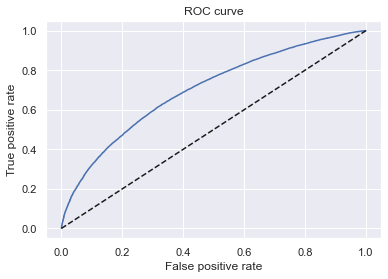

In [65]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

Calculating the Area Under the Receiver Operating Characteristic Curve (AUROC) from a set of actual values and their predicted probabilities.

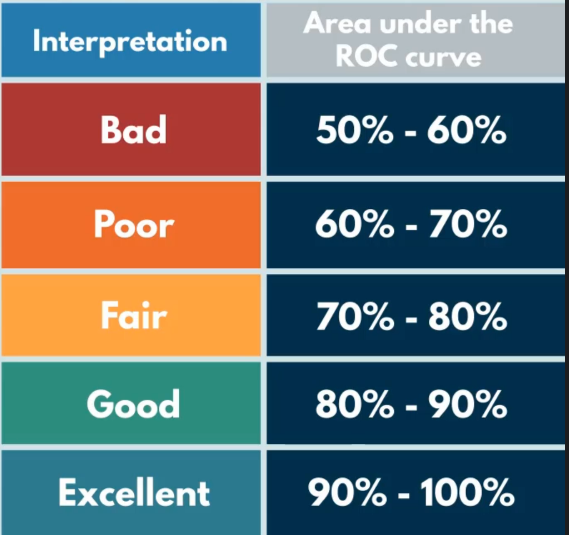

In [66]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.701702649715596

### Gini and Kolmogorov-Smirnov

In [67]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [68]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.3646,0
42344,1,0.4068,0
40518,0,0.4422,0
39810,0,0.4679,0
42396,0,0.4699,0


In [69]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [70]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.3646,0
1,42344,1,0.4068,0
2,40518,0,0.4422,0
3,39810,0,0.4679,0
4,42396,0,0.4699,0


In [71]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

In [72]:
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [73]:
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [74]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.3646,0,1,1,0
1,42344,1,0.4068,0,2,2,0
2,40518,0,0.4422,0,3,2,1
3,39810,0,0.4679,0,4,2,2
4,42396,0,0.4699,0,5,2,3


In [75]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

In [76]:
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

In [77]:
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [78]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.3646,0,1,1,0,0.0000,0.0000,0.0000
1,42344,1,0.4068,0,2,2,0,0.0000,0.0000,0.0000
2,40518,0,0.4422,0,3,2,1,0.0000,0.0000,0.0001
3,39810,0,0.4679,0,4,2,2,0.0000,0.0000,0.0002
4,42396,0,0.4699,0,5,2,3,0.0001,0.0000,0.0003


## Gini

Text(0.5, 1.0, 'Gini')

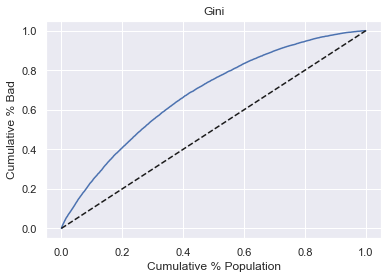

In [79]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [80]:
Gini = AUROC * 2 -1
Gini

0.4034052994311921

## KS

##### Maximum difference between the cummulative difference between the cummulative distributions functions of 'good' and 'bad' borrowers. Value ranges between 0 an 1. Higher the value, higher the model is fitted

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

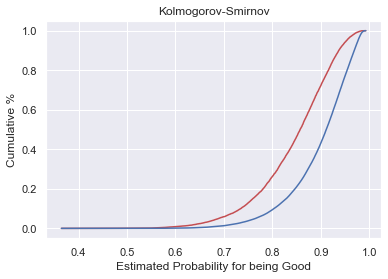

In [81]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

## Applying the PD Model

In [82]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [83]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.4247,NaN
1,grade:A,1.1410,0.0000
2,grade:B,0.8952,0.0000
3,grade:C,0.6996,0.0000
4,grade:D,0.5104,0.0000
5,grade:E,0.3328,0.0000
6,grade:F,0.1442,0.0034
7,home_ownership:OWN,0.0979,0.0000
8,home_ownership:MORTGAGE,0.1093,0.0000
9,addr_state:NM_VA,0.0369,0.2489


In [84]:
y_hat_test_proba

array([0.92459032, 0.85052453, 0.88498828, ..., 0.97297644, 0.95961368,
       0.95371198])

## Creating a Scorecard

In [85]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:sm_bus_edu_mov_hou',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>141',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [86]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])

In [87]:
df_ref_categories['Coefficients'] = 0

In [88]:
df_ref_categories['p_values'] = np.nan

In [89]:
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:sm_bus_edu_mov_hou,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>141,0,NaN
9,int_rate:>20.281,0,NaN


In [90]:
df_scorecard = pd.concat([summary_table, df_ref_categories])

In [91]:
df_scorecard.reset_index(drop = True, inplace = True)

In [92]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,p_values,Original feature name
0,Intercept,-1.4247,NaN,Intercept
1,grade:A,1.1410,0.0000,grade
2,grade:B,0.8952,0.0000,grade
3,grade:C,0.6996,0.0000,grade
4,grade:D,0.5104,0.0000,grade
5,grade:E,0.3328,0.0000,grade
6,grade:F,0.1442,0.0034,grade
7,home_ownership:OWN,0.0979,0.0000,home_ownership
8,home_ownership:MORTGAGE,0.1093,0.0000,home_ownership
9,addr_state:NM_VA,0.0369,0.2489,addr_state


In [93]:
min_score = 300
max_score = 850

In [94]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.4247
acc_now_delinq                 0.0000
addr_state                     0.0000
annual_inc                    -0.0783
dti                            0.0000
emp_length                     0.0000
grade                          0.0000
home_ownership                 0.0000
initial_list_status            0.0000
inq_last_6mths                 0.0000
int_rate                       0.0000
mths_since_earliest_cr_line    0.0000
mths_since_issue_d            -0.0780
mths_since_last_delinq         0.0000
mths_since_last_record         0.0000
purpose                        0.0000
term                           0.0000
verification_status           -0.0116
Name: Coefficients, dtype: float64

In [95]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.5925972834670146

In [96]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.4247
acc_now_delinq                 0.1826
addr_state                     0.5177
annual_inc                     0.5570
dti                            0.3876
emp_length                     0.1268
grade                          1.1410
home_ownership                 0.1093
initial_list_status            0.0542
inq_last_6mths                 0.6819
int_rate                       0.8774
mths_since_earliest_cr_line    0.2215
mths_since_issue_d             1.0871
mths_since_last_delinq         0.1863
mths_since_last_record         0.5188
purpose                        0.2020
term                           0.0773
verification_status            0.0870
Name: Coefficients, dtype: float64

In [97]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.590870310483823

In [98]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,Intercept,-1.4247,NaN,Intercept,-109.0795
1,grade:A,1.1410,0.0000,grade,87.3580
2,grade:B,0.8952,0.0000,grade,68.5438
3,grade:C,0.6996,0.0000,grade,53.5661
4,grade:D,0.5104,0.0000,grade,39.0799
5,grade:E,0.3328,0.0000,grade,25.4791
6,grade:F,0.1442,0.0034,grade,11.0368
7,home_ownership:OWN,0.0979,0.0000,home_ownership,7.4985
8,home_ownership:MORTGAGE,0.1093,0.0000,home_ownership,8.3681
9,addr_state:NM_VA,0.0369,0.2489,addr_state,2.8289


In [99]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\sathi\AppData\Local\Temp/ipykernel_13144/1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,Intercept,-1.4247,NaN,Intercept,312.8572
1,grade:A,1.1410,0.0000,grade,87.3580
2,grade:B,0.8952,0.0000,grade,68.5438
3,grade:C,0.6996,0.0000,grade,53.5661
4,grade:D,0.5104,0.0000,grade,39.0799
5,grade:E,0.3328,0.0000,grade,25.4791
6,grade:F,0.1442,0.0034,grade,11.0368
7,home_ownership:OWN,0.0979,0.0000,home_ownership,7.4985
8,home_ownership:MORTGAGE,0.1093,0.0000,home_ownership,8.3681
9,addr_state:NM_VA,0.0369,0.2489,addr_state,2.8289


In [100]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,-1.4247,NaN,Intercept,312.8572,313.0000
1,grade:A,1.1410,0.0000,grade,87.3580,87.0000
2,grade:B,0.8952,0.0000,grade,68.5438,69.0000
3,grade:C,0.6996,0.0000,grade,53.5661,54.0000
4,grade:D,0.5104,0.0000,grade,39.0799,39.0000
5,grade:E,0.3328,0.0000,grade,25.4791,25.0000
6,grade:F,0.1442,0.0034,grade,11.0368,11.0000
7,home_ownership:OWN,0.0979,0.0000,home_ownership,7.4985,7.0000
8,home_ownership:MORTGAGE,0.1093,0.0000,home_ownership,8.3681,8.0000
9,addr_state:NM_VA,0.0369,0.2489,addr_state,2.8289,3.0000


In [101]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [102]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [103]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,Intercept,-1.4247,NaN,Intercept,312.8572,313.0000,313.0000
1,grade:A,1.1410,0.0000,grade,87.3580,87.0000,87.0000
2,grade:B,0.8952,0.0000,grade,68.5438,69.0000,69.0000
3,grade:C,0.6996,0.0000,grade,53.5661,54.0000,54.0000
4,grade:D,0.5104,0.0000,grade,39.0799,39.0000,39.0000
5,grade:E,0.3328,0.0000,grade,25.4791,25.0000,25.0000
6,grade:F,0.1442,0.0034,grade,11.0368,11.0000,11.0000
7,home_ownership:OWN,0.0979,0.0000,home_ownership,7.4985,7.0000,7.0000
8,home_ownership:MORTGAGE,0.1093,0.0000,home_ownership,8.3681,8.0000,8.0000
9,addr_state:NM_VA,0.0369,0.2489,addr_state,2.8289,3.0000,3.0000


### Caclulating Credit Score

In [104]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [105]:
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,Intercept,-1.4247,NaN,Intercept,312.8572,313.0000,313.0000
1,grade:A,1.1410,0.0000,grade,87.3580,87.0000,87.0000
2,grade:B,0.8952,0.0000,grade,68.5438,69.0000,69.0000
3,grade:C,0.6996,0.0000,grade,53.5661,54.0000,54.0000
4,grade:D,0.5104,0.0000,grade,39.0799,39.0000,39.0000
5,grade:E,0.3328,0.0000,grade,25.4791,25.0000,25.0000
6,grade:F,0.1442,0.0034,grade,11.0368,11.0000,11.0000
7,home_ownership:OWN,0.0979,0.0000,home_ownership,7.4985,7.0000,7.0000
8,home_ownership:MORTGAGE,0.1093,0.0000,home_ownership,8.3681,8.0000,8.0000
9,addr_state:NM_VA,0.0369,0.2489,addr_state,2.8289,3.0000,3.0000


In [106]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [107]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [108]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names, exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [109]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [110]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>141,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [111]:
scorecard_scores = df_scorecard['Score - Final']

In [112]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [113]:
scorecard_scores.shape

(102,)

In [114]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [115]:
scorecard_scores.shape

(102, 1)

In [116]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [117]:
y_scores.head()

,0
362514,615.0000
288564,554.0000
213591,578.0000
263083,636.0000
165001,683.0000


### From Credit Score to PD

In [118]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [119]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.9256
288564,0.8488
213591,0.8848
263083,0.9425
165001,0.9680


In [120]:
y_hat_test_proba[0: 5]

array([0.92459032, 0.85052453, 0.88498828, 0.94280473, 0.96844444])

### Setting Cut-offs

In [121]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [122]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7367,2823
1,35857,47210


In [123]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.0790,0.0303
1,0.3845,0.5062


In [124]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5852322077699261

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

In [126]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99950932, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 2.52807974e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99266221, 0.99266221, 0.99023263, ..., 0.4842736 , 0.4422138 ,
        0.36463858]))

In [127]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

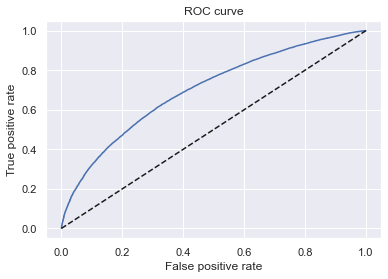

In [129]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [130]:
thresholds

array([1.99266221, 0.99266221, 0.99023263, ..., 0.4842736 , 0.4422138 ,
       0.36463858])

In [131]:
thresholds.shape

(17454,)

In [132]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [133]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [134]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.9927,0.0000,0.0000
1,0.9927,0.0000,0.0000
2,0.9902,0.0000,0.0003
3,0.9902,0.0001,0.0003
4,0.9897,0.0001,0.0005


In [135]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [136]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [137]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.0000,0.0000,0.0000,2057.0000
1,0.9927,0.0000,0.0000,798.0000
2,0.9902,0.0000,0.0003,776.0000
3,0.9902,0.0001,0.0003,775.0000
4,0.9897,0.0001,0.0005,771.0000


In [138]:
df_cutoffs['Score'][0] = max_score

In [139]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.0000,0.0000,0.0000,850.0000
1,0.9927,0.0000,0.0000,798.0000
2,0.9902,0.0000,0.0003,776.0000
3,0.9902,0.0001,0.0003,775.0000
4,0.9897,0.0001,0.0005,771.0000


In [140]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [141]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [142]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.0000,0.0000,0.0000,850.0000,0,93257,0.0000,1.0000
1,0.9927,0.0000,0.0000,798.0000,1,93256,0.0000,1.0000
2,0.9902,0.0000,0.0003,776.0000,21,93236,0.0002,0.9998
3,0.9902,0.0001,0.0003,775.0000,22,93235,0.0002,0.9998
4,0.9897,0.0001,0.0005,771.0000,41,93216,0.0004,0.9996


In [143]:
df_cutoffs.iloc[5000: 6200, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.9043,0.2547,0.5425,594.0000,47663,45594,0.5111,0.4889
5001,0.9043,0.2547,0.5428,594.0000,47686,45571,0.5113,0.4887
5002,0.9043,0.2548,0.5428,594.0000,47687,45570,0.5114,0.4886
5003,0.9042,0.2548,0.5429,594.0000,47693,45564,0.5114,0.4886
5004,0.9042,0.2549,0.5429,594.0000,47694,45563,0.5114,0.4886
5005,0.9042,0.2549,0.5430,594.0000,47701,45556,0.5115,0.4885
5006,0.9042,0.2550,0.5430,594.0000,47702,45555,0.5115,0.4885
5007,0.9042,0.2550,0.5431,594.0000,47710,45547,0.5116,0.4884
5008,0.9042,0.2551,0.5431,594.0000,47711,45546,0.5116,0.4884
5009,0.9042,0.2551,0.5431,594.0000,47712,45545,0.5116,0.4884


In [144]:
inputs_train_with_ref_cat.to_csv('F:\\Codes\\Dataset\\Credit analysis\\loan data\\inputs_train_with_ref_cat.csv')

In [145]:
df_scorecard.to_csv('F:\\Codes\\Dataset\\Credit analysis\\loan data\\df_scorecard.csv')